## Anne Urai, CSHL, 2019

code for https://www.abstractsonline.com/pp8/#!/7883/presentation/46202

see also Reinagel et al. Frontiers for effects of CA water in rats.

In [18]:
# GENERAL THINGS FOR COMPUTING AND PLOTTING
import pandas as pd
import numpy as np
import os, sys, time
from datetime import datetime
from datetime import timedelta
import scipy as sp

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")

# ibl specific things
import datajoint as dj
from ibl_pipeline import reference, subject, action, acquisition, data, behavior
from ibl_pipeline.analyses import behavior as behavioral_analyses

# set path for saving figures
figpath = 'figures' # put in the same folder, but add to .gitignore for now

# STUDY 1. effects of CA on water intake and weight
data collected by Ines Laranjeira and Fanny Cazettes, CCU

In [19]:
########### SUBJECTS ########### 

subj = subject.Subject * subject.SubjectLab * subject.SubjectProject & 'subject_project = "collab_citricacid"' & 'lab_name="mainenlab"'

########### WEIGHINGS ########### 

weight_with_date = action.Weighing.proj('weight', session_date='DATE(weighing_time)')
weight_date = (dj.U('subject_uuid', 'session_date') & weight_with_date) & 'session_date < "2018-10-24"'
baseline_date = (dj.U('subject_uuid', 'session_date') & weight_with_date) & 'session_date < "2018-09-24"'

avg_weight_date = weight_date.aggr(weight_with_date, avg_weight='AVG(weight)') 
avg_baseline_weight_date = baseline_date.aggr(weight_with_date, avg_weight = 'AVG(weight)')

b = subj * avg_weight_date 
bb = subj * avg_baseline_weight_date

weight_df = pd.DataFrame(b.fetch(as_dict=True))
#weight_df.tail(n=10)

baseline_df = pd.DataFrame(bb.fetch(as_dict=True))
#baseline_df.tail(n=10)

In [20]:
baseline_df

,subject_uuid,subject_project,session_date,subject_nickname,sex,subject_birth_date,ear_mark,subject_line,subject_source,protocol_number,subject_description,subject_ts,lab_name,subjectlab_ts,subjectproject_ts,avg_weight
0,0124f697-16ce-4f59-b87c-e53fcb3a27ac,collab_citricacid,2018-09-21,6867,M,2018-06-25,None,None,CCU - Margarida colonies,1,None,2019-09-25 01:33:25,mainenlab,2019-11-26 18:24:09,2019-11-26 18:23:59,29.139999
1,0124f697-16ce-4f59-b87c-e53fcb3a27ac,collab_citricacid,2018-09-17,6867,M,2018-06-25,None,None,CCU - Margarida colonies,1,None,2019-09-25 01:33:25,mainenlab,2019-11-26 18:24:09,2019-11-26 18:23:59,28.950001
2,0124f697-16ce-4f59-b87c-e53fcb3a27ac,collab_citricacid,2018-09-18,6867,M,2018-06-25,None,None,CCU - Margarida colonies,1,None,2019-09-25 01:33:25,mainenlab,2019-11-26 18:24:09,2019-11-26 18:23:59,28.540001
3,0124f697-16ce-4f59-b87c-e53fcb3a27ac,collab_citricacid,2018-09-19,6867,M,2018-06-25,None,None,CCU - Margarida colonies,1,None,2019-09-25 01:33:25,mainenlab,2019-11-26 18:24:09,2019-11-26 18:23:59,28.900000
4,0124f697-16ce-4f59-b87c-e53fcb3a27ac,collab_citricacid,2018-09-20,6867,M,2018-06-25,None,None,CCU - Margarida colonies,1,None,2019-09-25 01:33:25,mainenlab,2019-11-26 18:24:09,2019-11-26 18:23:59,28.950001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,f8f2ec95-bc15-4c72-bf93-74185cbd049f,collab_citricacid,2018-09-18,ZM_338,M,2018-08-08,None,None,CCU - Margarida colonies,1,None,2019-09-25 01:33:41,mainenlab,2019-11-26 18:24:19,2019-11-26 18:24:08,19.740000
193,f8f2ec95-bc15-4c72-bf93-74185cbd049f,collab_citricacid,2018-09-19,ZM_338,M,2018-08-08,None,None,CCU - Margarida colonies,1,None,2019-09-25 01:33:41,mainenlab,2019-11-26 18:24:19,2019-11-26 18:24:08,19.830000
194,f8f2ec95-bc15-4c72-bf93-74185cbd049f,collab_citricacid,2018-09-20,ZM_338,M,2018-08-08,None,None,CCU - Margarida colonies,1,None,2019-09-25 01:33:41,mainenlab,2019-11-26 18:24:19,2019-11-26 18:24:08,19.969999
195,f8f2ec95-bc15-4c72-bf93-74185cbd049f,collab_citricacid,2018-09-21,ZM_338,M,2018-08-08,None,None,CCU - Margarida colonies,1,None,2019-09-25 01:33:41,mainenlab,2019-11-26 18:24:19,2019-11-26 18:24:08,20.879999


In [21]:
########### WEIGHINGS NORMALIZATION and ########### 
########### CONVERSION OF SESSION DATES INTO SESSION NUMBERS ########### 

normalized_df = weight_df.copy()
# day 0 is the start of the experiment
normalized_df['session_day'] = (normalized_df['session_date'] - (datetime(2018, 9, 24)).date()).dt.days

normalized2 = pd.DataFrame([])
for index, sjdat in normalized_df.groupby(['subject_uuid']):
    sjdat['avg_weight'] = sjdat['avg_weight'] / sjdat.loc[sjdat.session_day < 1, 'avg_weight'].mean()
    normalized2 = normalized2.append(sjdat)

########### CONDITIONS ########### 

# CTL = free water regime (control)
# CA = ad libitum citric acid water
# FA = fixed amount of water per day (600 uL per weekday and 1 mL per weekend)
# CA = calculated amount (40 uL/g/day)

# now, we want to map these onto the subject names
CTL = 'Free water'
CA = 'Citric Acid'
WD = 'Weight-based amount'
FA = 'Fixed amount'

condition_map = {'ZM_205':CTL, 'ZM_335':CTL, '6873':CTL, 'ZM_200':CTL, 
'6867': CA, '6869':CA, 'ZM_209':CA, '6872':CA, 'ZM_342':CA,
'ZM_202':FA, 'ZM_337':FA, 'ZM_206':FA, 'ZM_208':FA, 
'ZM_203':WD, 'ZM_210':WD, 'ZM_338':WD, '6870':WD}

normalized2['condition'] = normalized2.subject_nickname.map(condition_map)


/anaconda3/envs/djenv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


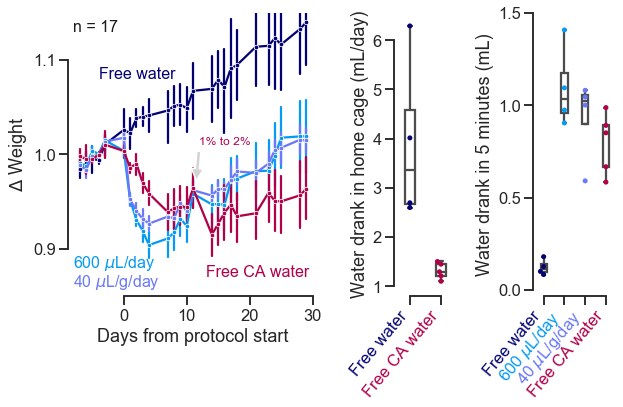

In [22]:
########### PLOTS ########### 
palette = sns.xkcd_palette(['deep blue', 'azure', 'cornflower', 'raspberry'])
hue_order = ['Free water', 'Fixed amount', 'Weight-based amount', 'Citric Acid']

f, ax = plt.subplots(ncols=3, nrows=1, gridspec_kw=dict(width_ratios=[3, 0.75, 1]), figsize=(9, 6))
    
sns.lineplot(x="session_day", y="avg_weight", err_style='bars', marker='.',
             ci=68, hue="condition", data=normalized2, ax=ax[0], legend=False, 
            palette=palette, hue_order=hue_order)
ax[0].set_xlabel("Days from protocol start")    
ax[0].set_ylabel("$\Delta$ Weight")         
ax[0].set(ylim=[0.85, 1.15], yticks=[0.9, 1, 1.1])
ax[0].text(-4, 1.08,'Free water', {'color':palette[0], 'fontsize':16})
ax[0].text(-8, 0.88,'600 $\mu$L/day', {'color':palette[1], 'fontsize':16})
ax[0].text(-8, 0.86,'40 $\mu$L/g/day', {'color':palette[2], 'fontsize':16})
ax[0].text(13, 0.87,'Free CA water', {'color':palette[3], 'fontsize':16})
ax[0].annotate('1% to 2%', xy=(11.5, 0.97), xytext=(12, 1.01), color=palette[3], fontsize=12,
              arrowprops=dict(facecolor='lightgrey', shrink=0.05))
ax[0].text(-8, 1.13, 'n = 17', {'color':'k', 'fontsize':16})

########### WATER ADMINISTRATIONS ########### 
water_with_date = (action.WaterAdministration & subj).proj('watertype_name', 'water_administered', 'adlib', # it can restrict on the subj here but it will anyway do later
                                                  session_date='DATE(administration_time)')
water_date = (dj.U('subject_uuid', 'session_date') & water_with_date) & 'session_date < "2018-10-24"'& 'session_date > "2018-10-05"'
total_water_date = water_date.aggr(water_with_date, total_water='SUM(water_administered)', 
                                   watertype="GROUP_CONCAT(DISTINCT watertype_name SEPARATOR '; ')", 
                                   adlib='MAX(adlib)')
b = subj * total_water_date # including water will exclude mice with ad lib water
df = pd.DataFrame(b.fetch(as_dict=True))

########### CONDITIONS ########### 

# CTL = free water regime (control)
# CA = ad libitum citric acid water
# FA = fixed amount of water per day (600 uL per weekday and 1 mL per weekend)
# CA = calculated amount (40 uL/g/day)

CA = 'Citric Acid'
WD = 'Weight-based amount'
FA = 'Fixed amount'
CTL = 'Free water'

condition_map = {'6867': CA, '6869':CA, 'ZM_209':CA, '6872':CA, 'ZM_342':CA,
'ZM_202':FA, 'ZM_337':FA, 'ZM_206':FA, 'ZM_208':FA, 
'ZM_203':WD, 'ZM_210':WD, 'ZM_338':WD, '6870':WD,
'ZM_205':CTL, 'ZM_335':CTL, '6873':CTL, 'ZM_200':CTL}

df['condition'] = df.subject_nickname.map(condition_map)

########### b ########### 
sns.swarmplot(x="condition", y="total_water", order=['Free water', 'Citric Acid'],  
              data=df.groupby(['subject_uuid', 'condition'])['total_water'].mean().reset_index(),
              palette = sns.xkcd_palette(['deep blue', 'raspberry']), ax=ax[1])
sns.boxplot(x="condition", y="total_water", order=[ 'Free water', 'Citric Acid'], 
            data=df.groupby(['subject_uuid', 'condition'])['total_water'].mean().reset_index(), 
            fliersize=0, boxprops={'facecolor':'None'}, width=.3, ax=ax[1])
ax[1].set(ylabel='Water drank in home cage (mL/day)', xlabel='')
ax[1].set_xticklabels(['Free water', 'Free CA water'])
ax[2].set_yticks([0, 2, 4, 6])

########### WATER ########### 
water= pd.read_csv('thirst.csv') # first date is exclude (habituation)
# remove measurements from 4-10-2018, CA mice still on 1%
water = water[~water['date'].str.match('4-10-2018')]

# MAP MICE ONTO DIFFERENT CONDITIONS
CA = 'Citric Acid'
WD = 'Weight-based amount'
FA = 'Fixed amount'
CTL = 'Free water'

condition_map = {'6867': CA, '6869':CA, 'ZM_209':CA, '6872':CA, 'ZM_342':CA,
'ZM_202':FA, 'ZM_337':FA, 'ZM_206':FA, 'ZM_208':FA, 
'ZM_203':WD, 'ZM_210':WD, 'ZM_338':WD, '6870':WD,
'ZM_205':CTL, 'ZM_335':CTL, '6873':CTL, 'ZM_200':CTL}

water['condition'] = water.subject.map(condition_map)

########### c ########### 
sns.swarmplot(x="condition", y="water_amount", order=hue_order,  
              data=water.groupby(['condition', 'subject'])['water_amount'].mean().reset_index(),
              ax=ax[2], palette=palette)
sns.boxplot(x="condition", y="water_amount", order=hue_order, 
            data=water.groupby(['condition', 'subject'])['water_amount'].mean().reset_index(),
            fliersize=0, boxprops={'facecolor':'None'}, width=.3, ax=ax[2])
ax[2].set(ylabel='Water drank in 5 minutes (mL)', xlabel='')
ax[2].set_xticklabels(['Free water', '600 $\mu$L/day', '40 $\mu$L/g/day', 'Free CA water'])
ax[2].set_yticks([0, 0.5, 1, 1.5])

# layout with rotated ticks
for ticklabel, tickcolor in zip(ax[1].get_xticklabels(), [palette[0], palette[3]]):
    ticklabel.set_color(tickcolor)
    ticklabel.set_rotation(50)
    ticklabel.set(ha='right')
    
for ticklabel, tickcolor in zip(ax[2].get_xticklabels(), palette):
    ticklabel.set_color(tickcolor)
    ticklabel.set_rotation(50)
    ticklabel.set(ha='right')
    
f.tight_layout()
sns.despine(trim=True)
f.savefig(os.path.join(figpath, "citricacid_study1.pdf"))
f.savefig(os.path.join(figpath, "citricacid_study1.png"), dpi=600)

In [23]:
water.groupby(['condition', 'subject'])['water_amount'].mean().reset_index().groupby(['condition']).describe()

water_amount                                          \
                           count      mean       std       min       25%   
condition                                                                  
Citric Acid                  5.0  0.795333  0.165875  0.583333  0.666667   
Fixed amount                 4.0  1.094167  0.222617  0.903333  0.955833   
Free water                   4.0  0.122500  0.042284  0.083333  0.095833   
Weight-based amount          4.0  0.928333  0.227913  0.590000  0.897500   

                                                   
                          50%       75%       max  
condition                                          
Citric Acid          0.850000  0.890000  0.986667  
Fixed amount         1.033333  1.171667  1.406667  
Free water           0.113333  0.140000  0.180000  
Weight-based amount  1.021667  1.052500  1.080000

# STUDY 2. effects of different water regimes on task motivation
data collected by Anne Urai and Valeria Aguillon, CSHL

In [24]:
# FIND THE DATA WE NEED
subj = (subject.Subject() & 'subject_birth_date < "2018-09-01"').proj('subject_nickname', 'sex') * \
    (subject.SubjectLab() & 'lab_name="churchlandlab"').proj()
print(subj)

# get date for each weighing
weight_with_date = action.Weighing.proj('weight', session_date='DATE(weighing_time)')
weight_date = (dj.U('subject_uuid', 'session_date') & weight_with_date)
avg_weight_date = weight_date.aggr(weight_with_date, avg_weight='AVG(weight)')

# NOW DO THE SAME FOR WATER
water_with_date = action.WaterAdministration.proj('watertype_name', 'water_administered', 'adlib',
                                                  session_date='DATE(administration_time)')
water_date = (dj.U('subject_uuid', 'session_date') & water_with_date)
# total_water_date = water_date.aggr(water_with_date, total_water='SUM(water_administered)', 
#                                    watertype="CONCAT_WS('; ', watertype_name)")
total_water_date = water_date.aggr(water_with_date, total_water='SUM(water_administered)', 
                                   watertype="GROUP_CONCAT(DISTINCT watertype_name SEPARATOR '; ')", 
                                   adlib='MAX(adlib)')
# get session with date
session_with_date = behavior.TrialSet.proj('n_trials') \
    * (acquisition.Session.proj(session_date='DATE(session_start_time)') & 'session_date > "2019-03-17"') \
    * behavioral_analyses.PsychResults()
b = subj * session_with_date * avg_weight_date * total_water_date
df = pd.DataFrame(b.fetch(as_dict=True))
#df.tail(n=10)

weight_normalized = pd.DataFrame([])
for index, sjdat in df.groupby(['subject_nickname']):
    sjdat['avg_weight'] = sjdat['avg_weight'] / sjdat['avg_weight'].mean()
    weight_normalized = weight_normalized.append(sjdat)

df = weight_normalized.copy()
df['performance_easy'] = df.performance_easy * 100

# ADD SOME MORE USEFUL INFO - group by week, from Saturday to Friday
df['session_date'] = pd.to_datetime(df.session_date)
df['week_number']  = df['session_date'].dt.week
df['weekday_name'] = df['session_date'].dt.day_name()
df['weekday']      = df['session_date'].dt.weekday

# THEN GIVE EVERY WEEK A CONDITION NAME!
#
# let's define 5 conditions
# O = one mL water in weekend, sucrose water in task
# C = citric acid water in weekend, sucrose water in task
# CC = citric acid water in weekend + week, sucrose water in task
# W = regular water in weekend, sucrose water in task
# WW = regular water in weekend + week, sucrose water in task
#
# now, we want to map these onto the week numbers
condition_map = {10:'CC', 11:'C', 12:'C', 13:'C', 14:'C', 15:'C', 16:'C', 
                 17:'CC', 18:'C', 19:'WW', 20:'O', 21:'C', 22:'C', 23:'C', 24:'C', 25:'WW',
                 27:'CC', 28:'WW', 29:'O', 30:'CC', 31:'W', 32:'O', 33:'W', 34:'W',
                 36:'H5', 37:'H2', 38:'C', 39:'H5'}
# condition_map = {10:'CC', 11:'C', 12:'C', 13:'C', 14:'C', 15:'C', 16:'C', 
#                  17:'CC', 18:'C', 19:'WW', 20:'O', 21:'C', 22:'C', 23:'C', 24:'C', 25:'WW',
#                  27:'CC', 28:'WW', 29:'O', 30:'CC', 31:'W', 32:'O', 33:'W', 34:'W'}
# week 26: leaks in tube, don't use

df['condition'] = df.week_number.map(condition_map)

# SHOW THIS, AND CHECK THAT IT'S CORRECT!
# sanitycheck = df.groupby(['week_number', 'condition', 'session_date', 'weekday_name'])['watertype'].unique()
# sanitycheck.to_csv(os.path.join(figpath, "check_water_conditions.csv"))

# redo the color mapping
condition_order = ["WW", "W", "O", "C", "CC", "H2", "H5"]
palette = sns.xkcd_palette(['deep blue', 'electric blue', 'azure', 'purpley pink', 'raspberry', 'lilac', 'dark lilac'])
df.describe()
marker_mapping = {'WW':'<', 'W':'>', 'O':'o', 'C':'v', 'CC':'^', 'H2':'P', 'H5':'X'}
condition_names = ['Free water', 'Free wknd water', '1mL/day', 
                   'Free wknd CA water', 'Free CA water', 'Wknd 2% CA Hydr', 'Wknd 5% CA Hydr']
print(sorted(df.subject_nickname.unique()))

*subject_uuid  subject_nickna sex    
+------------+ +------------+ +-----+
031c2ecf-455f- human0023      U      
033e34f1-e352- human0200      U      
034c07c5-69b0- IBL_25         M      
04631e68-7bae- human0195      U      
05e81ab3-073f- human0104      U      
063bc242-80a7- IBL_16         M      
07212dba-e186- human0154      U      
08dea2d2-7340- human0184      U      
0ab57398-e556- human0111      U      
0cd801df-6043- human0084      U      
0e35242e-f1e1- human0151      U      
0e53219b-0f24- human0114      U      
   ...
 (Total: 223)

['IBL_1', 'IBL_10', 'IBL_11', 'IBL_13', 'IBL_34', 'IBL_46']


/anaconda3/envs/djenv/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
df2 = df.loc[df.week_number < 35, :]
df3 = df.loc[df.week_number > 35, :]

In [26]:
# MAKE NICE-LOOKING DATE AXES
import matplotlib.dates as mdates
def fix_date_axis(ax):
    ax.xaxis_date()
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    for item in ax.get_xticklabels():
        item.set_rotation(30)
        item.set(ha='right')


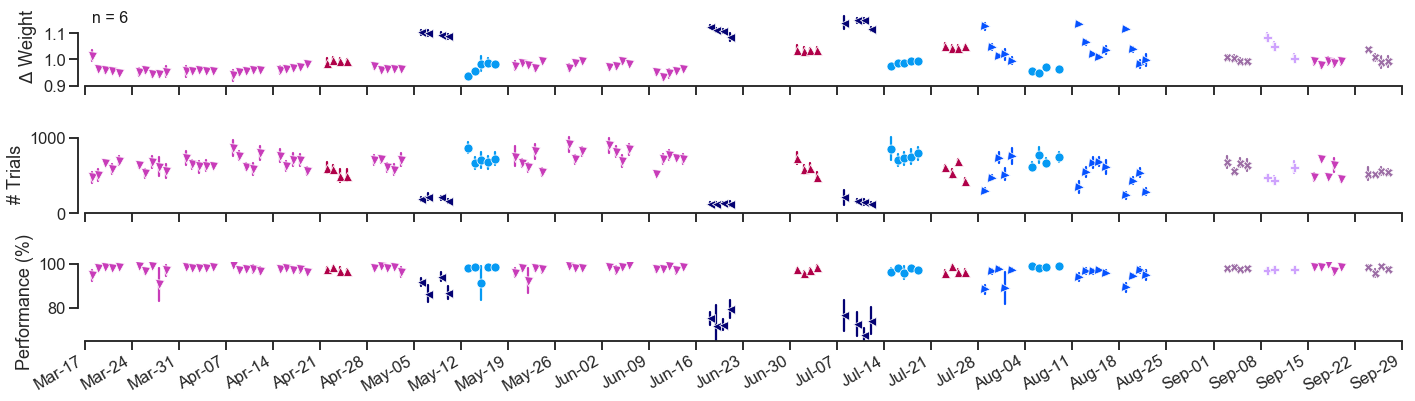

In [27]:
## NOW PLOT WITH SEABORN

f, ax = plt.subplots(ncols=1, nrows=3, 
                     gridspec_kw=dict(height_ratios=[1,1,1]), figsize=(20, 6))
ylims_weight = [0.9, 1.2]
ylims_ntrials = [0, 1050]
ylims_performance = [65, 101]
xlims = [df.session_date.min()-timedelta(days=2), df.session_date.max()+timedelta(days=3)]

sns.lineplot(x="session_date", y="avg_weight", err_style='bars', ci=68, hue="condition", 
             style='condition', markers=marker_mapping, dashes=False,
             linewidth=0, data=df, ax=ax[0], legend=False, hue_order=condition_order, palette=palette)
ax[0].set(ylabel="$\Delta$ Weight", ylim=ylims_weight, xlabel="", xlim=xlims)
ax[0].tick_params(labelbottom=False)    
ax[0].text(df.session_date.min(), ylims_weight[1]*0.95, 'n = 6', {'color':'k', 'fontsize':16})
sns.lineplot(x="session_date", y="n_trials", err_style='bars', ci=68, hue="condition", 
             style='condition', markers=marker_mapping, dashes=False,
             linewidth=0, data=df, ax=ax[1], legend=False, hue_order=condition_order, palette=palette)
ax[1].set(ylabel="# Trials", xlabel="", ylim=ylims_ntrials, xlim=xlims)
ax[1].tick_params(labelbottom=False)    
sns.lineplot(x="session_date", y="performance_easy", err_style='bars', ci=68, 
             hue="condition",style='condition', markers=marker_mapping, dashes=False,
             linewidth=0, data=df, ax=ax[2], legend=False, hue_order=condition_order, palette=palette)
ax[2].set(ylabel="Performance (%)", xlabel="", ylim=ylims_performance, xlim=xlims)

# set grid to show Mondays
fix_date_axis(ax[0])
fix_date_axis(ax[1])
fix_date_axis(ax[2])

# SAVE
f.tight_layout()
sns.despine(trim=True)
f.savefig(os.path.join(figpath, "citricacid_study2a.pdf"))
f.savefig(os.path.join(figpath, "citricacid_study2a.png"), dpi=400)


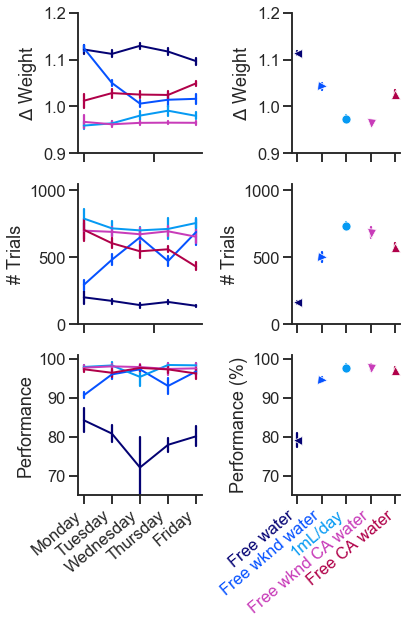

In [28]:
# remove hydrogel from this plot
f, ax = plt.subplots(ncols=2, nrows=3, 
                     gridspec_kw=dict(width_ratios=[0.8, 0.7], height_ratios=[1,1,1]), figsize=(6, 9))

## SECOND COLUMN
sns.lineplot(x="weekday", y="avg_weight", err_style='bars', ci=68, hue="condition",
             linewidth=2, 
             data=df2.groupby(['subject_nickname', 'weekday', 'condition'])['avg_weight'].mean().reset_index(),
             ax=ax[0,0], legend=False, hue_order=condition_order, palette=palette)
ax[0,0].set(ylabel="$\Delta$ Weight", ylim=ylims_weight, xlabel="")
ax[0,0].tick_params(labelbottom=False)    
sns.lineplot(x="weekday", y="n_trials", err_style='bars', ci=68, hue="condition",
             linewidth=2, data=df2.groupby(['subject_nickname', 'weekday', 'condition'])['n_trials'].mean().reset_index(),
             ax=ax[1,0], legend=False, hue_order=condition_order, palette=palette)
ax[1,0].set(ylabel="# Trials", ylim=ylims_ntrials, xlabel="")
ax[1,0].tick_params(labelbottom=False)    
sns.lineplot(x="weekday", y="performance_easy", err_style='bars', ci=68, hue="condition",
             linewidth=2, data=df2.groupby(['subject_nickname', 'weekday', 'condition'])['performance_easy'].mean().reset_index(),
             ax=ax[2,0], legend=False, hue_order=condition_order, palette=palette)
ax[2,0].set(ylabel="Performance", xticks=[0,1,2,3,4], 
          xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], xlabel="", ylim=ylims_performance)

for item in ax[2,0].get_xticklabels():
    item.set_rotation(40)
    item.set(ha='right')
    
## Third columns
sns.lineplot(x="condition", y="avg_weight", err_style='bars', style='condition', markers=marker_mapping, 
             ci=68, linewidth=2, hue_order=condition_order, palette=palette, hue="condition", 
             data=df2.groupby(['subject_nickname', 'condition'])['avg_weight'].mean().reset_index(),
             ax=ax[0,1])
#sns.boxplot(x="condition", y="avg_weight", order=condition_order,data=df, fliersize=0, ax=ax[0,2], boxprops={'facecolor':'None'}, width=.3)
ax[0,1].set(ylabel="$\Delta$ Weight", xlabel="", ylim=ylims_weight)
ax[0,1].get_legend().remove()
ax[0,1].tick_params(labelbottom=False)    

sns.lineplot(x="condition", y="n_trials", err_style='bars', style='condition', markers=marker_mapping, 
             ci=68, linewidth=2, hue_order=condition_order, palette=palette, hue="condition", 
             data=df2.groupby(['subject_nickname', 'condition'])['n_trials'].mean().reset_index(),
             ax=ax[1,1])
#sns.boxplot(x="condition", y="n_trials", order=condition_order, data=df, fliersize=0, ax=ax[1,2], boxprops={'facecolor':'None'}, width=.3)
ax[1,1].set(ylabel="# Trials", xlabel="", ylim=ylims_ntrials)
ax[1,1].get_legend().remove()
ax[1,1].tick_params(labelbottom=False)    
sns.lineplot(x="condition", y="performance_easy", err_style='bars', style='condition', markers=marker_mapping, 
             ci=68, linewidth=2, hue_order=condition_order, palette=palette, hue="condition", 
             data=df2.groupby(['subject_nickname', 'condition'])['performance_easy'].mean().reset_index(),
             ax=ax[2,1])
#sns.lineplot(x="condition", y="performance_easy", order=condition_order, data=df, fliersize=0, ax=ax[2,2], boxprops={'facecolor':'None'}, width=.3)
ax[2,1].set(ylabel="Performance (%)", xlabel="", ylim=ylims_performance)
ax[2,1].get_legend().remove()
ax[2,1].set_xticklabels(condition_names)

for ticklabel, tickcolor in zip(ax[2,1].get_xticklabels(), palette):
    ticklabel.set_color(tickcolor)
    ticklabel.set_rotation(40)
    ticklabel.set(ha='right')

# SAVE
f.tight_layout()
sns.despine()
f.savefig(os.path.join(figpath, "citricacid_study2b.pdf"))
f.savefig(os.path.join(figpath, "citricacid_study2b.eps"))
f.savefig(os.path.join(figpath, "citricacid_study2b.png"), dpi=400)


In [29]:
#### simple t-test for trial counts
statdat = df2.groupby(['subject_nickname', 'condition'])['n_trials'].mean().reset_index()
oneml = statdat.loc[statdat.condition == 'O', 'n_trials']
ca = statdat.loc[statdat.condition == 'C', 'n_trials']
statistic, pval = sp.stats.ttest_rel(oneml, ca)
print('weekend CA vs measured water: t(%d) = %.3f, p = %.4f'%(len(ca)-1, statistic, pval))

#### simple t-test for trial counts
statdat = df2.groupby(['subject_nickname', 'condition'])['n_trials'].mean().reset_index()
cc = statdat.loc[statdat.condition == 'CC', 'n_trials']
ca = statdat.loc[statdat.condition == 'C', 'n_trials']
statistic, pval = sp.stats.ttest_rel(oneml, ca)
print('weekend CA vs week CA: mean %d vs %d, t(%d) = %.3f, p = %.4f'%(np.mean(ca), np.mean(cc), len(ca)-1, statistic, pval))

weekend CA vs measured water: t(5) = 0.880, p = 0.4193
weekend CA vs week CA: mean 682 vs 573, t(5) = 0.880, p = 0.4193


In [30]:
df2.groupby(['condition', 'weekday', 'subject_nickname'])['n_trials'].mean().groupby(['condition', 'weekday']).describe()


count        mean         std         min         25%  \
condition weekday                                                          
C         0          6.0  699.106019  153.920488  552.444444  593.331250   
          1          6.0  689.763636   99.930419  576.181818  609.925000   
          2          6.0  672.029630  110.699409  531.500000  620.100000   
          3          6.0  694.016667  107.298060  523.800000  640.200000   
          4          6.0  653.145833  135.380330  428.375000  602.531250   
CC        0          6.0  705.083333  211.170409  435.000000  581.875000   
          1          6.0  604.888889  102.441239  464.666667  581.333333   
          2          6.0  544.722222  133.222190  381.333333  440.583333   
          3          6.0  559.555556   62.196344  476.000000  527.500000   
          4          6.0  429.833333   78.519849  312.000000  384.500000   
O         0          6.0  789.250000  190.097395  500.000000  682.666667   
          1          6.0  716.055556  151.188097  494.000000  611.916667   
          2          6.0  700.944444   66.740431  587.666667  685.583333   
          3          6.0  711.750000  202.736467  484.500000  581.875000   
          4          6.0  756.222222  101.614668  580.333333  737.250000   
W         0          6.0  293.722222   97.337081  183.333333  220.000000   
          1          6.0  481.666667  109.063692  355.666667  390.333333   
          2          6.0  648.888889  144.398933  464.333333  559.833333   
          3          6.0  471.430556  103.508835  313.000000  424.812500   
          4          6.0  688.750000  254.939356  468.500000  511.875000   
WW        0          6.0  200.750000  120.959807  109.000000  124.375000   
          1          6.0  173.916667   53.525150  120.000000  143.750000   
          2          6.0  142.666667   53.524449   66.500000  111.625000   
          3          6.0  166.111111   40.371424  119.000000  142.000000   
          4          6.0  137.166667   22.059264  107.333333  125.166667   

                          50%         75%          max  
condition weekday                                       
C         0        671.895833  739.666667   969.000000  
          1        682.400000  774.300000   806.900000  
          2        637.300000  761.525000   808.777778  
          3        708.550000  773.225000   811.000000  
          4        669.500000  734.781250   814.750000  
CC        0        673.000000  827.500000  1019.000000  
          1        595.500000  609.416667   783.000000  
          2        542.166667  662.250000   693.666667  
          3        547.000000  603.500000   644.000000  
          4        439.500000  491.500000   513.000000  
O         0        832.333333  894.000000  1023.500000  
          1        769.666667  819.416667   867.666667  
          2        699.833333  749.833333   771.000000  
          3        651.500000  850.875000  1007.000000  
          4        773.000000  790.500000   889.333333  
W         0        277.333333  371.666667   420.333333  
          1        486.666667  549.750000   632.000000  
          2        633.500000  729.916667   864.666667  
          3        471.125000  536.750000   605.333333  
          4        604.250000  776.875000  1140.000000  
WW        0        167.750000  205.125000   432.500000  
          1        157.750000  188.625000   270.000000  
          2        141.000000  183.125000   208.500000  
          3        169.333333  170.416667   235.333333  
          4        137.166667  145.666667   171.666667

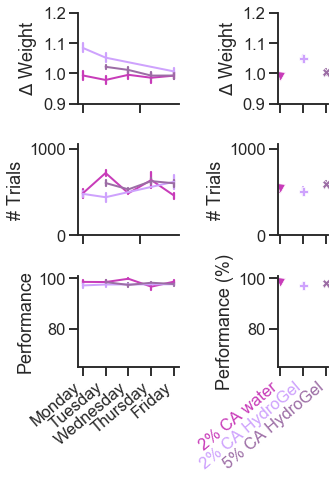

In [31]:
# NOW REPEAT, BUT ONLY WITH HYDROGEL + CA WEEKEND!!!
f, ax = plt.subplots(ncols=2, nrows=3, 
                     gridspec_kw=dict(width_ratios=[1, 0.5], height_ratios=[1,1,1]), figsize=(5,7))

condition_names = ['2% CA water', '2% CA HydroGel', '5% CA HydroGel']
condition_order = ["C","H2", "H5"]
palette = sns.xkcd_palette(['purpley pink', 'lilac', 'dark lilac'])
marker_mapping = { 'C':'v',  'H2':'P', 'H5':'X'}

## SECOND COLUMN
sns.lineplot(x="weekday", y="avg_weight", err_style='bars', ci=68, hue="condition",
             linewidth=2, 
             data=df3.groupby(['subject_nickname', 'weekday', 'condition'])['avg_weight'].mean().reset_index(),
             ax=ax[0,0], legend=False, hue_order=condition_order, palette=palette)
ax[0,0].set(ylabel="$\Delta$ Weight", ylim=ylims_weight, xlabel="")
ax[0,0].tick_params(labelbottom=False)    
sns.lineplot(x="weekday", y="n_trials", err_style='bars', ci=68, hue="condition",
             linewidth=2, data=df3.groupby(['subject_nickname', 'weekday', 'condition'])['n_trials'].mean().reset_index(),
             ax=ax[1,0], legend=False, hue_order=condition_order, palette=palette)
ax[1,0].set(ylabel="# Trials", ylim=ylims_ntrials, xlabel="")
ax[1,0].tick_params(labelbottom=False)    
sns.lineplot(x="weekday", y="performance_easy", err_style='bars', ci=68, hue="condition",
             linewidth=2, data=df3.groupby(['subject_nickname', 'weekday', 'condition'])['performance_easy'].mean().reset_index(),
             ax=ax[2,0], legend=False, hue_order=condition_order, palette=palette)
ax[2,0].set(ylabel="Performance", xticks=[0,1,2,3,4], 
          xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], xlabel="", ylim=ylims_performance)

for item in ax[2,0].get_xticklabels():
    item.set_rotation(40)
    item.set(ha='right')
    
## Third columns
sns.lineplot(x="condition", y="avg_weight", err_style='bars', style='condition', markers=marker_mapping, 
             ci=68, linewidth=2, hue_order=condition_order, palette=palette, hue="condition", 
             data=df3.groupby(['subject_nickname', 'condition'])['avg_weight'].mean().reset_index(),
             ax=ax[0,1])
#sns.boxplot(x="condition", y="avg_weight", order=condition_order,data=df, fliersize=0, ax=ax[0,2], boxprops={'facecolor':'None'}, width=.3)
ax[0,1].set(ylabel="$\Delta$ Weight", xlabel="", ylim=ylims_weight)
ax[0,1].get_legend().remove()
ax[0,1].tick_params(labelbottom=False)    

sns.lineplot(x="condition", y="n_trials", err_style='bars', style='condition', markers=marker_mapping, 
             ci=68, linewidth=2, hue_order=condition_order, palette=palette, hue="condition", 
             data=df3.groupby(['subject_nickname', 'condition'])['n_trials'].mean().reset_index(),
             ax=ax[1,1])
#sns.boxplot(x="condition", y="n_trials", order=condition_order, data=df, fliersize=0, ax=ax[1,2], boxprops={'facecolor':'None'}, width=.3)
ax[1,1].set(ylabel="# Trials", xlabel="", ylim=ylims_ntrials)
ax[1,1].get_legend().remove()
ax[1,1].tick_params(labelbottom=False)    
sns.lineplot(x="condition", y="performance_easy", err_style='bars', style='condition', markers=marker_mapping, 
             ci=68, linewidth=2, hue_order=condition_order, palette=palette, hue="condition", 
             data=df3.groupby(['subject_nickname', 'condition'])['performance_easy'].mean().reset_index(),
             ax=ax[2,1])
#sns.lineplot(x="condition", y="performance_easy", order=condition_order, data=df, fliersize=0, ax=ax[2,2], boxprops={'facecolor':'None'}, width=.3)
ax[2,1].set(ylabel="Performance (%)", xlabel="", ylim=ylims_performance)
ax[2,1].get_legend().remove()
ax[2,1].set_xticklabels(condition_names)

for ticklabel, tickcolor in zip(ax[2,1].get_xticklabels(), palette):
    ticklabel.set_color(tickcolor)
    ticklabel.set_rotation(40)
    ticklabel.set(ha='right')

# SAVE
f.tight_layout()
sns.despine()
f.savefig(os.path.join(figpath, "citricacid_study3c.pdf"))
f.savefig(os.path.join(figpath, "citricacid_study3c.eps"))
f.savefig(os.path.join(figpath, "citricacid_study3c.png"), dpi=600)


# STUDY 2b. effects of CA in water vs Hydrogel
data collected by Valeria Aguillon and Anne Urai, CSHL
    

In [32]:
# FIND THE DATA WE NEED
# BATCH 4

# get date for each weighing
weight_with_date = action.Weighing.proj('weight', session_date='DATE(weighing_time)')
weight_date = (dj.U('subject_uuid', 'session_date') & weight_with_date)
avg_weight_date = weight_date.aggr(weight_with_date, avg_weight='AVG(weight)')

batch4 = subject.Subject() & 'subject_nickname IN ("IBL_13", "IBL_14", "IBL_15", "IBL_16", "IBL_17")'
b = batch4 * (avg_weight_date & 'session_date BETWEEN "2018-08-05" AND "2018-09-12"')
df_batch4 = pd.DataFrame(b.fetch(as_dict=True, order_by='subject_nickname, session_date'))
df_batch4['session_day'] = (df_batch4['session_date'] - df_batch4['session_date'].min()).dt.days

# map onto conditions: see https://docs.google.com/spreadsheets/d/1jzaMEiuRPmbd6cu15IpWFyGqUkuHvlzF31b6ljAP5mc/edit#gid=420909701
bins = [np.datetime64('2018-08-05'), np.datetime64('2018-08-10'), np.datetime64('2018-08-17'), 
        np.datetime64('2018-08-28'), np.datetime64('2018-09-11')]
names = [1, 2, 4, 6]
df_batch4['condition'] = pd.cut(df_batch4.session_date, bins, labels=names)
tmpdf = df_batch4.loc[df_batch4.avg_weight > 30, :]

print(tmpdf)

# baseline correct with the first two days
for index, group in df_batch4.groupby(['subject_nickname']):
      df_batch4['avg_weight'][df_batch4.index.isin(group.index)] =  group['avg_weight'] / group[group['condition'] == 1]['avg_weight'].values.mean()

###### the other batch
batch2 = subject.Subject() & 'subject_nickname IN ("IBL_18", "IBL_19", "IBL_20", "IBL_21", "IBL_22", "IBL_23", "IBL_24", "IBL_25", "IBL_26", "IBL_27")'
b = batch2 * (avg_weight_date & 'session_date BETWEEN "2018-08-09" AND "2018-10-05"')
df_batch2 = pd.DataFrame(b.fetch(as_dict=True))
df_batch2['session_day'] = (df_batch2['session_date'] - df_batch2['session_date'].min()).dt.days

# map onto conditions
# Q: where is this info?
bins = [np.datetime64('2018-08-07'), np.datetime64('2018-08-24'), 
        np.datetime64('2018-09-17'), np.datetime64('2018-10-05')]
names = [1, 6, 5]
df_batch2['condition'] = pd.cut(df_batch2.session_date, bins, labels=names)
df_batch2 = df_batch2[df_batch2.session_day != 12] # hack

# baseline correct with the first two days
for index, group in df_batch2.groupby(['subject_nickname']):
     df_batch2['avg_weight'][df_batch2.index.isin(group.index)] = group['avg_weight']/ group[group['condition'] == 1]['avg_weight'].values.mean()
        

Empty DataFrame
Columns: [subject_uuid, session_date, subject_nickname, sex, subject_birth_date, ear_mark, subject_line, subject_source, protocol_number, subject_description, subject_ts, avg_weight, session_day, condition]
Index: []


/anaconda3/envs/djenv/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/anaconda3/envs/djenv/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
## PLOT #####
palette = sns.cubehelix_palette(4)
blue = sns.xkcd_palette(['azure'])
palette[0] = blue[0]

f, ax = plt.subplots(ncols=1, nrows=2, figsize=(5, 7), sharey=True)
sns.lineplot(x="session_day", y="avg_weight",  units='subject_nickname', estimator=None, 
             data=df_batch4, ax=ax[0], legend=False, color='lightgrey')
sns.lineplot(x="session_day", y="avg_weight", hue='condition', marker='o', ms=5,
             linewidth=0, units='subject_nickname', estimator=None, err_style='bars', 
             data=df_batch4, ax=ax[0], legend=False, palette=palette)
ax[0].set_xlabel("Days")    
ax[0].text(0, 1.2, 'n = 5', {'color':'k', 'fontsize':16})
ax[0].set_ylabel("$\Delta$ Weight")    
ax[0].set_ylim([0.8, 1.35])

ax[0].annotate('1 mL/day', xy=(0, 0.95), xytext=(0, 0.85), color=blue[0], fontsize=14,
              arrowprops=dict(facecolor='lightgrey', shrink=0.05))
ax[0].annotate('2% CA HydroGel', xy=(5, 1.02), xytext=(5, 0.90), color=palette[1], fontsize=14,
              arrowprops=dict(facecolor='lightgrey', shrink=0.05))
ax[0].annotate('4% CA HydroGel', xy=(13, 1.13), xytext=(13, 0.95), color=palette[2], fontsize=14,
              arrowprops=dict(facecolor='lightgrey', shrink=0.05))
ax[0].annotate('6% CA HydroGel', xy=(23, 1.12), xytext=(23, 1), color=palette[3], fontsize=14,
              arrowprops=dict(facecolor='lightgrey', shrink=0.05))


### second panel
palette = sns.cubehelix_palette(5)
sns.lineplot(x="session_day", y="avg_weight",  units='subject_nickname', estimator=None, 
             data=df_batch2, ax=ax[1], legend=False, color='lightgrey')
sns.lineplot(x="session_day", y="avg_weight", hue='condition', marker='o', ms=5,
             linewidth=0, units='subject_nickname', estimator=None, err_style='bars', 
             data=df_batch2, ax=ax[1], legend=False)
ax[1].set_xlabel("Days")    
ax[1].set_ylabel("$\Delta$ Weight")  
ax[1].text(0, 0.85, 'n = 10', {'color':'k', 'fontsize':16})

ax[1].annotate('1% CA water', xy=(0, 1.1), xytext=(0, 1.2), color=palette[0], fontsize=14,
              arrowprops=dict(facecolor='lightgrey', shrink=0.05))
ax[1].annotate('6% CA HydroGel', xy=(16, 1.03), xytext=(10, 1.13), color=palette[4], fontsize=14,
              arrowprops=dict(facecolor='lightgrey', shrink=0.05))
ax[1].annotate('5% CA HydroGel', xy=(41, 1.1), xytext=(39, 1.18), color=palette[3], fontsize=14,
              arrowprops=dict(facecolor='lightgrey', shrink=0.05))

# SAVE
f.tight_layout()
sns.despine(trim=True)
f.savefig(os.path.join(figpath, "citricacid_study3.pdf"))
f.savefig(os.path.join(figpath, "citricacid_study3.png"), dpi=600)
plt.close('all')
print('done')

done
